In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp
from sklearn import preprocessing


In [7]:
df = pd.read_csv(r'COOL_3500_14000_ML_covariates_2208.csv')

# df = pd.read_csv(r'woodburn_ML_0_30cm_no_outliers.csv')

df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_number.1':'core_number'})
df = df.rename(columns={'core_120_carbon_mass':'carbon_core_120'})
df = df.rename(columns={'core_carbo':'carbon_core_120'}) # different input for NATR
df = df.rename(columns={'core_30_c':'carbon_core_30'})


df = df.drop(['Unnamed: 0','field_1','property_name','CEA','strata_nam','sampling_round','core_number','actual_lat','actual_lon'], axis = 1)
df.tail()

,carbon_core_30,carbon_core_120,difference,topsoil_Cs,subsoil_Cs,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,...,ndvi_stabl,mrvbf,gamma_th_k,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04
302,32.896838,106.114320,73.217482,48.94765,87.11006,2985279.50,5952380.5,7324546,6734105.0,4339266.5,...,6756138.5,6.77906,11.82228,11.89627,49.98874,1.00626,0.10346,0.10234,0.2029,0.0950
303,48.147591,133.859357,85.711766,46.37137,90.57382,2985540.00,5952612.0,7324686,6734116.5,4339146.0,...,5958782.5,6.63950,11.63178,12.25910,51.83471,1.05393,0.12047,0.10676,0.2134,0.1001
304,44.790334,155.471416,110.681082,41.68763,88.78339,2983852.75,5950829.5,7323286,6733474.0,4339433.0,...,6045238.5,6.93628,11.91337,11.95680,51.17888,1.00365,0.10279,0.12142,0.2007,0.0830
305,41.209194,153.688069,112.478875,49.07010,94.83672,2984784.25,5951632.5,7323746,6733467.5,4338961.5,...,6770582.5,6.75485,16.28521,13.08905,51.70673,0.80374,0.10469,0.08906,0.1806,0.0875
306,34.712181,95.309744,60.597562,47.23005,93.47065,2984558.00,5951230.5,7323276,6733055.5,4338718.0,...,6340177.5,6.67617,16.41548,12.49831,49.83781,0.76137,0.10915,0.10632,0.2068,0.0872


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        389 non-null    int64  
 1   carbon_core_120   389 non-null    float64
 2   topsoil_Cs        389 non-null    float64
 3   subsoil_Cs        389 non-null    float64
 4   slope_pc          389 non-null    float64
 5   s_twi             389 non-null    float64
 6   ogc_6             389 non-null    float64
 7   ogc_5             389 non-null    float64
 8   ogc_4             389 non-null    int64  
 9   ogc_3             389 non-null    float64
 10  ogc_2             389 non-null    float64
 11  ogc_1             389 non-null    float64
 12  ndvi_stabl        389 non-null    float64
 13  mrvbf             389 non-null    float64
 14  gamma_th          389 non-null    float64
 15  gamma_tds         389 non-null    float64
 16  gamma_k           389 non-null    float64
 1

In [6]:
# get the columns we want
cols_to_norm_df = df.drop('carbon_core_120', axis = 1)
# convert to array
# transform all the data
df_array = np.array(cols_to_norm_df)
df_array

array([[0, 36.03293, 32.0545, ..., -24.94521845859784, 150.840926461969,
        44.37027572568918],
       [1, 36.69437, 28.51077, ..., -24.922135399221293,
        150.82780168809552, 41.05263708505668],
       [2, 33.11657, 31.95604, ..., -24.9236877638286,
        150.82507284722035, 47.681562930537446],
       ...,
       [386, 43.65667, 63.37782, ..., -24.96873360326446,
        150.89435577804548, 54.38969014669986],
       [387, 44.7404, 50.21032, ..., -24.96858649421157,
        150.87685112511446, 44.96674632172711],
       [388, 43.94597, 66.10999, ..., -24.969282268026856,
        150.8935152805063, 40.01745994947931]], dtype=object)

In [7]:
target_df = df['carbon_core_120'].reset_index()
target_df

,index,carbon_core_120
0,0,83.495461
1,1,66.072313
2,2,99.682242
3,3,41.952111
4,4,55.243882
5,5,109.911644
6,6,43.881721
7,7,68.015688
8,8,45.241996
9,9,74.571548


In [8]:
# df_trans = preprocessing(df_trans['slope'])
d = preprocessing.normalize(df_array, axis = 0)
scaled_df = pd.DataFrame(d , columns = cols_to_norm_df.columns).reset_index()
scaled_df
# merge with only column 1 of df
transformed_df = target_df.merge(scaled_df, on = 'index', how = 'left').drop('index', axis = 1)
transformed_df


ValueError: could not convert string to float: 'T1'

In [11]:
df.columns

Index(['Unnamed: 0', 'carbon_core_120', 'topsoil_Cs', 'subsoil_Cs', 'slope_pc',
       's_twi', 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1',
       'ndvi_stabl', 'mrvbf', 'gamma_th', 'gamma_tds', 'gamma_k', 'clay_idx',
       'bi', 'band_12', 'band_04', 'v_depth', 'Unnamed: 0.1', 'lower_depth',
       'strata_name', 'sampling_round.1', 'actual_latitude',
       'actual_longitude', 'carbon_core_30'],
      dtype='object')

In [12]:
df

,Unnamed: 0,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,ogc_2,ogc_1,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth,Unnamed: 0.1,lower_depth,strata_name,sampling_round.1,actual_latitude,actual_longitude,carbon_core_30
0,0,83.495461,36.03293,32.05450,5.56868,6.84590,3375476.50,6128493.0,7239385,6410489.5,3863908.50,281996.4688,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403,102,30,1,T1,-24.945218,150.840926,44.370276
1,1,66.072313,36.69437,28.51077,8.42459,6.11087,3377924.25,6131373.0,7241925,6412009.5,3864000.75,280636.4688,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615,103,30,1,T1,-24.922135,150.827802,41.052637
2,2,99.682242,33.11657,31.95604,4.57981,8.82289,3378076.75,6131357.0,7241745,6411713.5,3863668.25,280356.4688,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759,104,30,1,T1,-24.923688,150.825073,47.681563
3,3,41.952111,40.79656,27.02616,7.24964,6.33211,3376703.50,6129888.5,7240575,6411155.0,3863871.50,281266.4688,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038,105,30,1,T1,-24.934411,150.833870,32.507482
4,4,55.243882,31.71140,25.24116,4.65329,6.79252,3377923.25,6131401.0,7241975,6412067.5,3864051.75,280666.4688,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834,106,30,1,T1,-24.921637,150.828180,42.122259
5,5,109.911644,22.73345,33.34913,4.44023,7.52416,3375875.25,6129064.0,7239975,6410940.5,3864099.75,281876.4688,8065706.5,3.92143,24.85184,104.60228,2.59607,0.18646,0.06004,0.1927,0.0781,4.79325,107,30,1,T1,-24.939895,150.839836,48.278216
6,6,43.881721,30.31492,24.27525,5.41682,7.95235,3377476.25,6130537.0,7240925,6411113.5,3863448.75,280576.4688,8122361.0,4.69669,30.89708,124.30589,2.97209,0.18021,0.06435,0.1997,0.0825,16.99237,108,30,1,T1,-24.931097,150.827116,34.838696
7,7,68.015688,37.43840,31.41789,7.42219,7.36470,3377813.25,6131210.5,7241755,6411877.0,3863941.75,280666.4688,8590734.0,4.12206,22.13679,97.62059,2.43987,0.17260,0.06675,0.2113,0.0857,8.72912,109,30,1,T1,-24.923677,150.828113,48.818253
8,8,45.241996,32.71876,28.79280,3.21707,8.69960,3378076.50,6131466.5,7241935,6411933.0,3863858.50,280466.4688,11502522.0,4.33722,29.23747,118.87160,2.72410,0.22261,0.05794,0.1753,0.0702,9.88048,110,30,1,T1,-24.922000,150.826136,34.012589
9,9,74.571548,27.41046,19.11683,4.73283,7.38262,3377674.25,6130680.0,7240975,6411056.5,3863300.75,280376.4688,9262708.0,4.51193,29.83571,119.85533,2.88836,0.21065,0.06165,0.1795,0.0774,7.50394,111,30,1,T1,-24.930660,150.825077,52.258647


In [13]:
df

,Unnamed: 0,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,ogc_2,ogc_1,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth,Unnamed: 0.1,lower_depth,strata_name,sampling_round.1,actual_latitude,actual_longitude,carbon_core_30
0,0,83.495461,36.03293,32.05450,5.56868,6.84590,3375476.50,6128493.0,7239385,6410489.5,3863908.50,281996.4688,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403,102,30,1,T1,-24.945218,150.840926,44.370276
1,1,66.072313,36.69437,28.51077,8.42459,6.11087,3377924.25,6131373.0,7241925,6412009.5,3864000.75,280636.4688,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615,103,30,1,T1,-24.922135,150.827802,41.052637
2,2,99.682242,33.11657,31.95604,4.57981,8.82289,3378076.75,6131357.0,7241745,6411713.5,3863668.25,280356.4688,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759,104,30,1,T1,-24.923688,150.825073,47.681563
3,3,41.952111,40.79656,27.02616,7.24964,6.33211,3376703.50,6129888.5,7240575,6411155.0,3863871.50,281266.4688,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038,105,30,1,T1,-24.934411,150.833870,32.507482
4,4,55.243882,31.71140,25.24116,4.65329,6.79252,3377923.25,6131401.0,7241975,6412067.5,3864051.75,280666.4688,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834,106,30,1,T1,-24.921637,150.828180,42.122259
5,5,109.911644,22.73345,33.34913,4.44023,7.52416,3375875.25,6129064.0,7239975,6410940.5,3864099.75,281876.4688,8065706.5,3.92143,24.85184,104.60228,2.59607,0.18646,0.06004,0.1927,0.0781,4.79325,107,30,1,T1,-24.939895,150.839836,48.278216
6,6,43.881721,30.31492,24.27525,5.41682,7.95235,3377476.25,6130537.0,7240925,6411113.5,3863448.75,280576.4688,8122361.0,4.69669,30.89708,124.30589,2.97209,0.18021,0.06435,0.1997,0.0825,16.99237,108,30,1,T1,-24.931097,150.827116,34.838696
7,7,68.015688,37.43840,31.41789,7.42219,7.36470,3377813.25,6131210.5,7241755,6411877.0,3863941.75,280666.4688,8590734.0,4.12206,22.13679,97.62059,2.43987,0.17260,0.06675,0.2113,0.0857,8.72912,109,30,1,T1,-24.923677,150.828113,48.818253
8,8,45.241996,32.71876,28.79280,3.21707,8.69960,3378076.50,6131466.5,7241935,6411933.0,3863858.50,280466.4688,11502522.0,4.33722,29.23747,118.87160,2.72410,0.22261,0.05794,0.1753,0.0702,9.88048,110,30,1,T1,-24.922000,150.826136,34.012589
9,9,74.571548,27.41046,19.11683,4.73283,7.38262,3377674.25,6130680.0,7240975,6411056.5,3863300.75,280376.4688,9262708.0,4.51193,29.83571,119.85533,2.88836,0.21065,0.06165,0.1795,0.0774,7.50394,111,30,1,T1,-24.930660,150.825077,52.258647


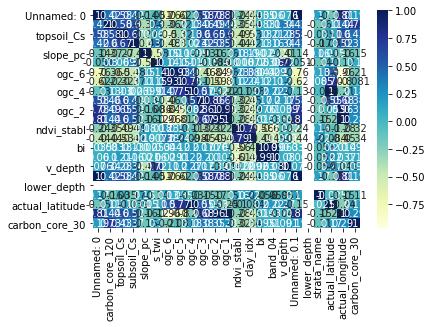

,Unnamed: 0,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,ogc_2,ogc_1,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth,Unnamed: 0.1,lower_depth,strata_name,sampling_round.1,actual_latitude,actual_longitude,carbon_core_30
0,0,83.495461,36.03293,32.05450,5.56868,6.84590,3375476.50,6128493.0,7239385,6410489.5,3863908.50,281996.4688,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403,102,30,1,T1,-24.945218,150.840926,44.370276
1,1,66.072313,36.69437,28.51077,8.42459,6.11087,3377924.25,6131373.0,7241925,6412009.5,3864000.75,280636.4688,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615,103,30,1,T1,-24.922135,150.827802,41.052637
2,2,99.682242,33.11657,31.95604,4.57981,8.82289,3378076.75,6131357.0,7241745,6411713.5,3863668.25,280356.4688,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759,104,30,1,T1,-24.923688,150.825073,47.681563
3,3,41.952111,40.79656,27.02616,7.24964,6.33211,3376703.50,6129888.5,7240575,6411155.0,3863871.50,281266.4688,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038,105,30,1,T1,-24.934411,150.833870,32.507482
4,4,55.243882,31.71140,25.24116,4.65329,6.79252,3377923.25,6131401.0,7241975,6412067.5,3864051.75,280666.4688,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834,106,30,1,T1,-24.921637,150.828180,42.122259
5,5,109.911644,22.73345,33.34913,4.44023,7.52416,3375875.25,6129064.0,7239975,6410940.5,3864099.75,281876.4688,8065706.5,3.92143,24.85184,104.60228,2.59607,0.18646,0.06004,0.1927,0.0781,4.79325,107,30,1,T1,-24.939895,150.839836,48.278216
6,6,43.881721,30.31492,24.27525,5.41682,7.95235,3377476.25,6130537.0,7240925,6411113.5,3863448.75,280576.4688,8122361.0,4.69669,30.89708,124.30589,2.97209,0.18021,0.06435,0.1997,0.0825,16.99237,108,30,1,T1,-24.931097,150.827116,34.838696
7,7,68.015688,37.43840,31.41789,7.42219,7.36470,3377813.25,6131210.5,7241755,6411877.0,3863941.75,280666.4688,8590734.0,4.12206,22.13679,97.62059,2.43987,0.17260,0.06675,0.2113,0.0857,8.72912,109,30,1,T1,-24.923677,150.828113,48.818253
8,8,45.241996,32.71876,28.79280,3.21707,8.69960,3378076.50,6131466.5,7241935,6411933.0,3863858.50,280466.4688,11502522.0,4.33722,29.23747,118.87160,2.72410,0.22261,0.05794,0.1753,0.0702,9.88048,110,30,1,T1,-24.922000,150.826136,34.012589
9,9,74.571548,27.41046,19.11683,4.73283,7.38262,3377674.25,6130680.0,7240975,6411056.5,3863300.75,280376.4688,9262708.0,4.51193,29.83571,119.85533,2.88836,0.21065,0.06165,0.1795,0.0774,7.50394,111,30,1,T1,-24.930660,150.825077,52.258647


In [14]:
# try the heatmap with transformed data
heatmap_df = df.drop( ['gamma_th', 'gamma_tds', 'gamma_k','band_12','mrvbf',], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
# # displaying heatmap
mp.show()

# based on heatmap, now choose highly correlated variables
correlated_df = df.drop( [], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)

correlated_df


In [15]:
correlated_df.describe()

,Unnamed: 0,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,ogc_2,ogc_1,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth,Unnamed: 0.1,lower_depth,strata_name,actual_latitude,actual_longitude,carbon_core_30
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.890000e+02,3.890000e+02,3.890000e+02,3.890000e+02,3.890000e+02,389.000000,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.0,389.000000,389.000000,389.000000,389.000000
mean,194.000000,101.816771,47.956638,41.942666,4.174899,8.131729,3.374230e+06,6.127840e+06,7.239500e+06,6.411343e+06,3.865271e+06,283502.818414,8.646912e+06,4.124041,14.959894,64.196806,1.557444,0.154044,0.062276,0.183244,0.078570,15.358081,296.000000,30.0,3.889460,-24.944393,150.855837,49.928025
std,112.438872,42.369004,16.371116,18.171380,1.903266,1.359968,2.703721e+03,2.096806e+03,1.466926e+03,1.679457e+03,2.394598e+03,2824.683915,2.219647e+06,1.914753,10.819098,43.895688,1.098181,0.049151,0.011726,0.032071,0.015784,15.606832,112.438872,0.0,2.037184,0.013335,0.027911,13.803831
min,0.000000,24.694681,17.790700,10.643030,0.179550,5.699690,3.368684e+06,6.122912e+06,7.236405e+06,6.407427e+06,3.860114e+06,278146.468800,4.752180e+06,0.133840,2.056410,12.757310,0.163250,0.026930,0.029840,0.096400,0.033600,1.019650,102.000000,30.0,1.000000,-24.972960,150.803085,15.847031
25%,97.000000,70.474983,31.783200,25.241160,2.977090,7.046010,3.372082e+06,6.126496e+06,7.238345e+06,6.410372e+06,3.863727e+06,281316.468800,6.793668e+06,2.682090,5.891790,23.873820,0.455750,0.117630,0.054160,0.161400,0.067700,4.710300,199.000000,30.0,2.000000,-24.954857,150.834209,40.159575
50%,194.000000,98.768325,50.867330,42.084570,4.105740,7.905800,3.374286e+06,6.127806e+06,7.239525e+06,6.411428e+06,3.865384e+06,283476.468800,8.224461e+06,3.991340,11.851510,53.140790,1.354240,0.147040,0.062750,0.184400,0.079500,9.486850,296.000000,30.0,4.000000,-24.944477,150.855510,48.792896
75%,291.000000,128.177946,58.505900,55.840190,5.478130,9.059090,3.376189e+06,6.129314e+06,7.240635e+06,6.412334e+06,3.866998e+06,285606.468800,1.051730e+07,5.123430,22.318780,97.956310,2.650360,0.192930,0.069690,0.204600,0.088600,19.942100,393.000000,30.0,5.000000,-24.934112,150.876516,58.645096
max,388.000000,231.715555,125.402730,84.975640,10.037920,12.298240,3.379781e+06,6.132439e+06,7.242855e+06,6.415414e+06,3.870393e+06,288716.468800,1.583669e+07,8.913330,44.017980,170.858430,3.734830,0.283380,0.105530,0.271400,0.132400,72.150700,490.000000,30.0,8.000000,-24.914134,150.907183,97.648919


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'carbon_core_120'}>,
        <AxesSubplot:title={'center':'topsoil_Cs'}>,
        <AxesSubplot:title={'center':'subsoil_Cs'}>,
        <AxesSubplot:title={'center':'slope_pc'}>],
       [<AxesSubplot:title={'center':'s_twi'}>,
        <AxesSubplot:title={'center':'ogc_6'}>,
        <AxesSubplot:title={'center':'ogc_5'}>,
        <AxesSubplot:title={'center':'ogc_4'}>,
        <AxesSubplot:title={'center':'ogc_3'}>],
       [<AxesSubplot:title={'center':'ogc_2'}>,
        <AxesSubplot:title={'center':'ogc_1'}>,
        <AxesSubplot:title={'center':'ndvi_stabl'}>,
        <AxesSubplot:title={'center':'mrvbf'}>,
        <AxesSubplot:title={'center':'gamma_th'}>],
       [<AxesSubplot:title={'center':'gamma_tds'}>,
        <AxesSubplot:title={'center':'gamma_k'}>,
        <AxesSubplot:title={'center':'clay_idx'}>,
        <AxesSubplot:title={'center':'bi'}>,
        <AxesSubplot:title={'center':'band_

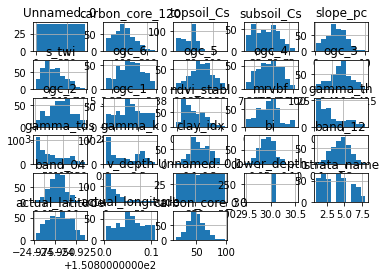

In [16]:
Core_SOC_df = correlated_df
Core_SOC_df.hist()

In [17]:
# Investigating drivers of Core_SOC

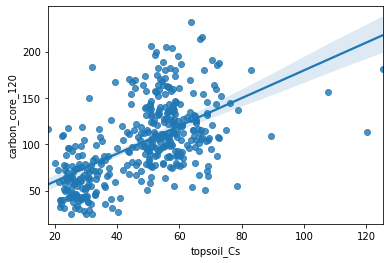

In [18]:
g = sns.regplot(x ='topsoil_Cs', y =  'carbon_core_120', data = Core_SOC_df)

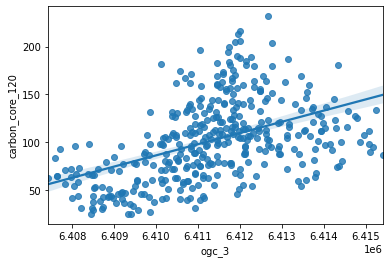

In [19]:
g = sns.regplot(x ='ogc_3', y =  'carbon_core_120', data = Core_SOC_df)

In [20]:
Core_SOC_df.columns

Index(['Unnamed: 0', 'carbon_core_120', 'topsoil_Cs', 'subsoil_Cs', 'slope_pc',
       's_twi', 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1',
       'ndvi_stabl', 'mrvbf', 'gamma_th', 'gamma_tds', 'gamma_k', 'clay_idx',
       'bi', 'band_12', 'band_04', 'v_depth', 'Unnamed: 0.1', 'lower_depth',
       'strata_name', 'sampling_round.1', 'actual_latitude',
       'actual_longitude', 'carbon_core_30'],
      dtype='object')

In [21]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(Core_SOC_df
,target='carbon_core_120'
#,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='BODO_0-30_ML'
#,ignore_features = ['mrvbf']
#, transformation = True, transform_target = True	# this changes r2 down
# ,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.50
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
# , transformation = True
#, pca = True   			# decrease from 0.29 to 0.1982
)


# try these things
# transformation = True, transform_target = True, 
#                   combine_rare_levels = True, rare_level_threshold = 0.05,
#                   remove_multicollinearity = True, multicollinearity_threshold = 0.95, 

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(389, 29)"
3,Missing Values,False
4,Numeric Features,25
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(272, 4)"


In [22]:
compare_models()
# first run of df3 = R2 = 0.48
# ignore features - , ignore_features = ['B04Jun2020'] #,'slope_percent','gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent'] #,'gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent','gamma_u'] R2 = 0.4857
#, transformation = True, 		R2 from = 0.4857 to 0.4682
# transform_target = True, 		R2 from = 0.4682 to 0.3966
###### transform and transform target don't improve results
# , remove_multicollinearity = True - turn off multicollin	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.95 	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.25	R2 from = 0.4857 to 0.4959
# ,multicollinearity_threshold = 0.05	R2 from = 0.4959 to 0.4959
#,normalize = True, turned off 		R2 from = 0.4959 to 0.4959
# feature_sel_threshold = 0.9 to 0.20	R2 from = 0.4959 to 0.4959

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
# try collinearity threthold - chnaged to 0.5 and see if the model peforms better
# R2 = 0.5441
# try w only 3 input variables 	0.5436
# transform target = True 	R2 from = 0.5436 to 0.5412
# remove outliers 	 	R2 from = 0.5412 0.5365	
# transformation = True 	R2 from = 0.5365 to 	0.5050	
# add CEA and strata name 	R2 from = 0.5050 0.5412

# BODO - 120 - Aug 2022 experiments
# , feature_selection_threshold = 0.05 R2 from 0.3181 to 0.318
# adding CEA and strata name    R2 from 0.3181 to 0.318
# turn PCA on			R2 from 0.3181 to 0.318	
# turn feature interaction on	R2 from 0.3181 to 0.1376	

# BODO - 30 - Aug 2022 experiments



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,19.3505,633.4914,24.7797,0.6116,0.2441,0.2094,0.5020
lar,Least Angle Regression,19.3505,633.4913,24.7797,0.6116,0.2441,0.2094,0.0150
ridge,Ridge Regression,19.3513,633.7398,24.7852,0.6114,0.2432,0.2091,0.0080
huber,Huber Regressor,19.1133,641.3788,24.8519,0.6093,0.2395,0.1989,0.0110
br,Bayesian Ridge,19.5647,645.7063,25.0230,0.6036,0.2445,0.2117,0.0050
lasso,Lasso Regression,19.5995,646.9061,25.0461,0.6027,0.2453,0.2125,0.0120
en,Elastic Net,19.6081,647.4194,25.0573,0.6026,0.2448,0.2123,0.0060
rf,Random Forest Regressor,20.5151,741.8052,26.9456,0.5428,0.2522,0.2128,0.0920
knn,K Neighbors Regressor,20.6285,756.7473,27.0582,0.5389,0.2676,0.2222,0.0060
et,Extra Trees Regressor,20.5063,763.0908,27.2302,0.5349,0.2554,0.2140,0.1030


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [46]:
model = create_model('huber') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.9139,58.9945,7.6808,0.1704,0.2353,0.1854
1,5.0243,49.2585,7.0184,0.1857,0.1963,0.1433
2,4.2272,24.5836,4.9582,0.3264,0.1462,0.1256
3,5.9077,59.8880,7.7387,0.4191,0.2176,0.1745
4,4.1670,30.4792,5.5208,0.5396,0.1884,0.1536
5,5.9998,58.8585,7.6719,0.3139,0.3024,0.2854
6,4.7155,55.9695,7.4813,0.2905,0.2895,0.2234
7,6.8618,69.5541,8.3399,0.1109,0.2752,0.2601
8,5.9909,48.7466,6.9819,0.4250,0.2137,0.2029
9,4.1714,27.8635,5.2786,0.2863,0.1470,0.1205


In [47]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.8752,58.7252,7.6632,0.1742,0.2345,0.1843
1,5.0219,49.2704,7.0193,0.1855,0.1958,0.1429
2,4.2182,24.4279,4.9425,0.3307,0.1455,0.1251
3,5.9621,61.0633,7.8143,0.4077,0.2187,0.1750
4,4.1953,30.6237,5.5339,0.5374,0.1888,0.1545
5,6.0533,60.0973,7.7522,0.2994,0.3052,0.2884
6,4.7391,55.5535,7.4534,0.2957,0.2885,0.2231
7,6.7886,67.9646,8.2441,0.1312,0.2721,0.2569
8,6.0321,49.2453,7.0175,0.4191,0.2145,0.2040
9,4.0687,27.3954,5.2341,0.2983,0.1456,0.1168


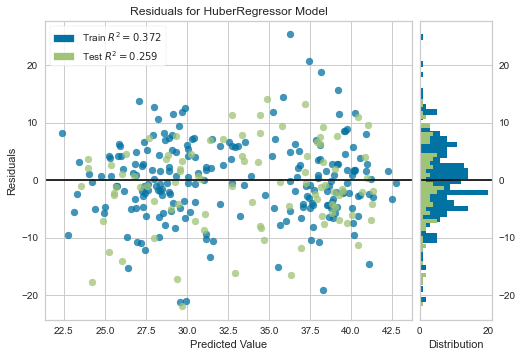

In [52]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.034, test = 0.427

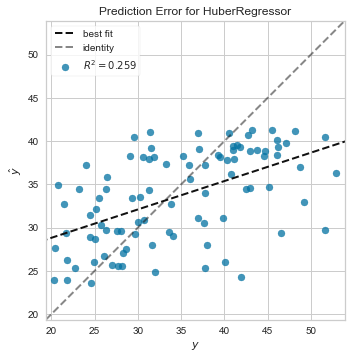

In [53]:
plot_model(tuned, plot = 'error')

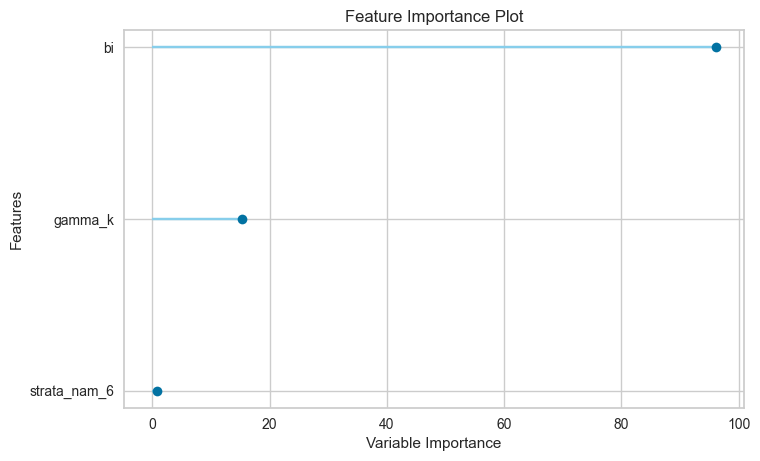

In [54]:
plot_model(tuned, plot = 'feature')

In [51]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…